In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [4]:
CSV_PATH= 'Life Expectancy Data.csv'
country_dict = {}
with open(CSV_PATH) as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        country, year, _, Life_expectancy = row[:4]
        if country not in country_dict.keys():
            country_dict[country] = {}
        try:
            country_dict[country][year] = float(Life_expectancy)
        except:
            country_dict[country][year] = ''

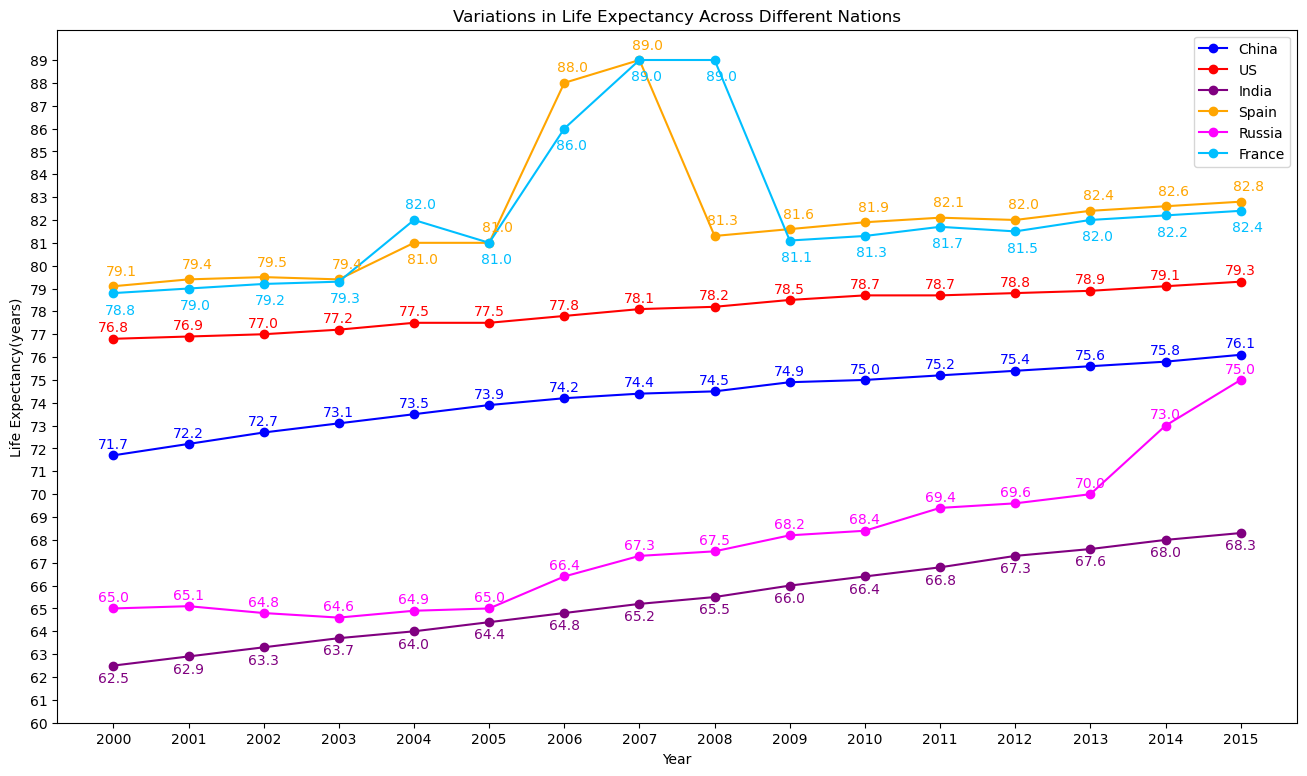

In [21]:
# Figure 1: Line Plot
plt.figure(figsize=(16, 9))
selected_countries = ['China','United States of America','India','Spain','Russian Federation','France']
colors = ['blue','red','purple','orange','magenta', 'deepskyblue']
years = [str(i) for i in range(2000,2016)]
for j, country in enumerate(selected_countries):
    data = []
    for year in years:
        data.append(country_dict[country][year])
    if country == 'United States of America':
        country = 'US'
    if country == 'Russian Federation':
        country = 'Russia'
    plt.plot(years, data, label=country, color=colors[j], marker='o', linestyle='-')
    # 添加数据标签
    if country == 'France':
        for i, data_point in enumerate(data):
            if i == 4:
                plt.annotate(str(data_point), (years[i], data_point), textcoords="offset points", xytext=(5,8), ha='center',color=colors[j])
            else:
                plt.annotate(str(data_point), (years[i], data_point), textcoords="offset points", xytext=(5,-15), ha='center',color=colors[j])
        continue
    if country == 'India':
        for i, data_point in enumerate(data):
            plt.annotate(str(data_point), (years[i], data_point), textcoords="offset points", xytext=(0,-12), ha='center',color=colors[j])
        continue
    if country == 'Spain':
        for i, data_point in enumerate(data):
            if i == 4:
                plt.annotate(str(data_point), (years[i], data_point), textcoords="offset points", xytext=(6,-15), ha='center',color=colors[j])
            else:
                plt.annotate(str(data_point), (years[i], data_point), textcoords="offset points", xytext=(6,8), ha='center',color=colors[j])
        continue
    for i, data_point in enumerate(data):
        plt.annotate(str(data_point), (years[i], data_point), textcoords="offset points", xytext=(0,5), ha='center',color=colors[j])

my_y_ticks = np.arange(60, 90, 1)
plt.yticks(my_y_ticks)


# 添加标签和标题
plt.xlabel('Year')
plt.ylabel('Life Expectancy(years)')
plt.title('Variations in Life Expectancy Across Different Nations')

# 添加图例
plt.legend()

# # 添加网格
# plt.grid(True)
# plt.savefig("line.png",bbox_inches='tight')
plt.show()

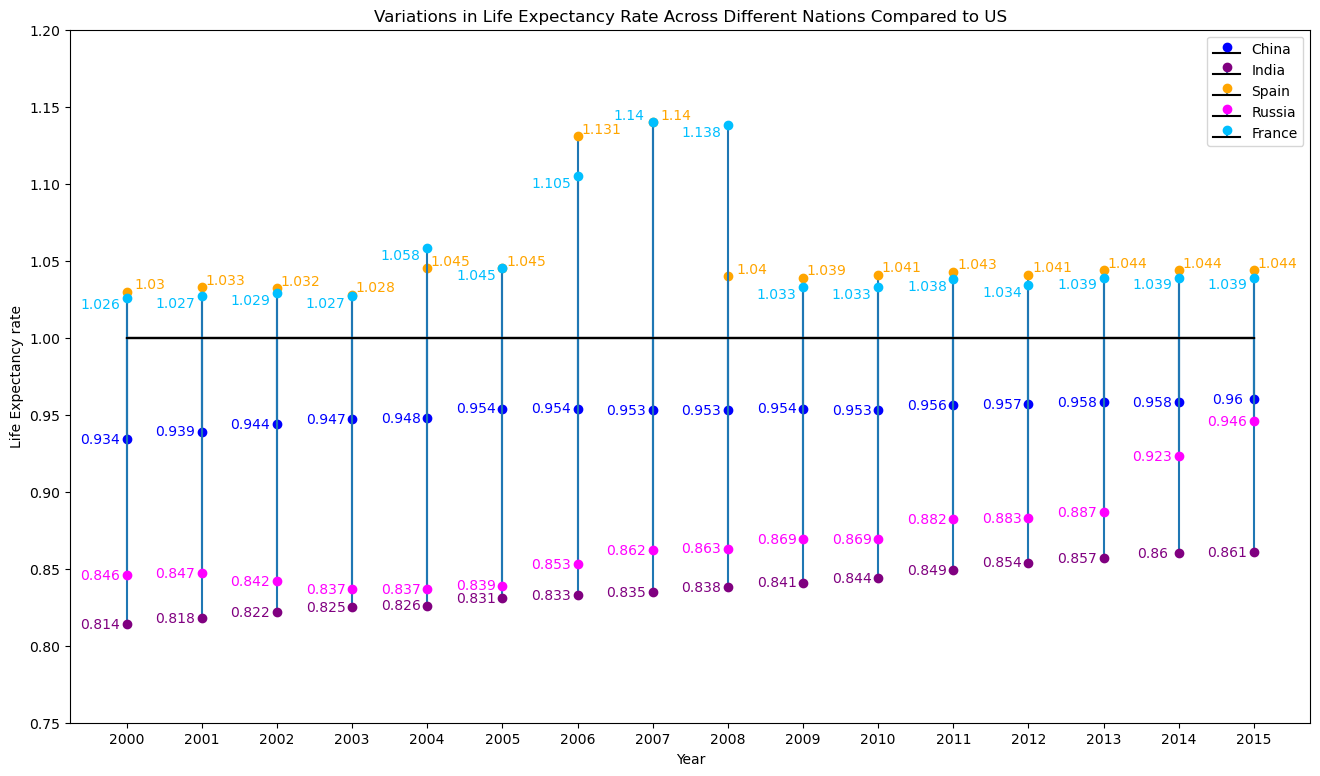

In [22]:
# Figure 2: Stem Plot
plt.figure(figsize=(16, 9))
selected_countries = ['China','United States of America','India','Spain','Russian Federation','France']
colors = ['blue','red','purple','orange','magenta', 'deepskyblue']
years = [str(i) for i in range(2000,2016)]
for j, country in enumerate(selected_countries):
    data = []
    for year in years:
        data.append(round(country_dict[country][year]/country_dict['United States of America'][year],3))
    if country == 'United States of America':
        country = 'US'
        continue
    if country == 'Russian Federation':
        country = 'Russia'
    plt.stem(years, data, label=country, linefmt='-', markerfmt=colors[j], basefmt='k-', bottom=1)

    if country == 'France':
        for i, data_point in enumerate(data):
            if i == 7:
                plt.annotate(str(data_point), (years[i], data_point), textcoords="offset points", xytext=(-17,2), ha='center',color=colors[j])
            else:
                plt.annotate(str(data_point), (years[i], data_point), textcoords="offset points", xytext=(-19,-8), ha='center',color=colors[j])
        continue

    if country == 'Spain':
        for i, data_point in enumerate(data):
            plt.annotate(str(data_point), (years[i], data_point), textcoords="offset points", xytext=(17,2), ha='center',color=colors[j])
        continue

    for i, data_point in enumerate(data):
        plt.annotate(str(data_point), (years[i], data_point), textcoords="offset points", xytext=(-19,-3), ha='center',color=colors[j])

plt.ylim(0.75, 1.2)

# 添加标签和标题
plt.xlabel('Year')
plt.ylabel('Life Expectancy Rate')
plt.title('Variations in Life Expectancy Rate Across Different Nations Compared to US')

# 添加图例
plt.legend()

# # 添加网格
# plt.grid(True)
plt.savefig("stem.png",bbox_inches='tight')
plt.show()

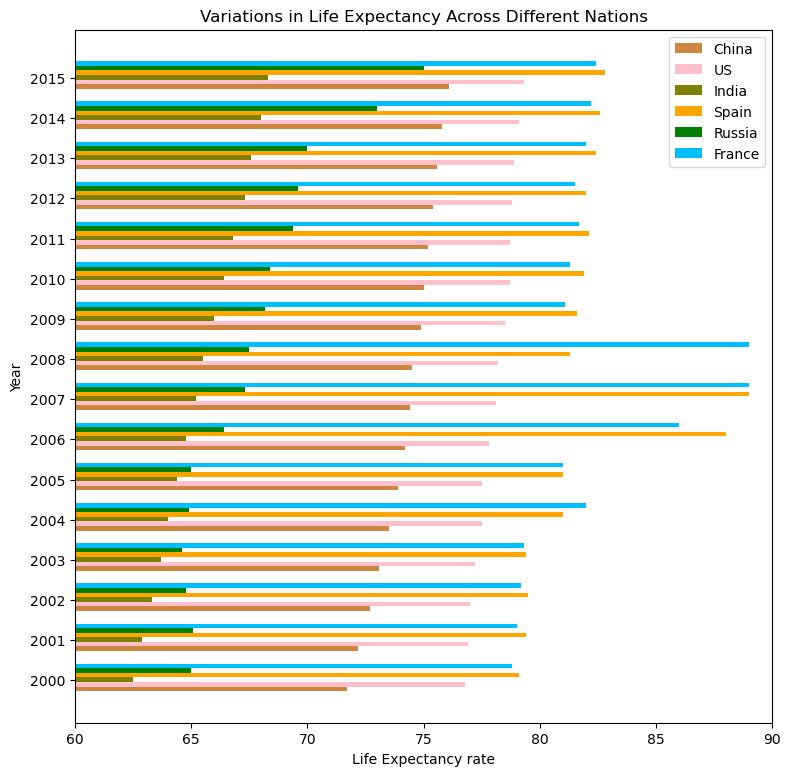

In [20]:
# Figure 3: bar Plot
plt.figure(figsize=(9, 9))
selected_countries = ['China','United States of America','India','Spain','Russian Federation','France']
colors = ['peru','pink','olive','orange','green', 'deepskyblue']
years = [str(i) for i in range(2000,2016)]
padding = 3
width = 0.8
bar_width = np.arange(2016 - 2000) * (5 * width + padding)
for j, country in enumerate(selected_countries):
    data = []
    for year in years:
        data.append(country_dict[country][year])
    if country == 'United States of America':
        country = 'US'
    if country == 'Russian Federation':
        country = 'Russia'
    plt.barh(bar_width + width * j, data,  label=country, color=colors[j])

plt.yticks(bar_width + 1.5, range(2000, 2016))
plt.xlim(60,90)

# 添加标签和标题
plt.xlabel('Life Expectancy')
plt.ylabel('Year')
plt.title('Variations in Life Expectancy Across Different Nations')

# 添加图例
plt.legend()

# # 添加网格
# plt.grid(True)
plt.savefig("bar.png",bbox_inches='tight')
plt.show()